In [1]:
pip install tensorflow


  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.67.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached h5py-3.12.1-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using ca

In [6]:
import numpy as np
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [10]:
print(train_images.shape)
print(test_images.shape)
# This shows the number of images for out train and test segments and their pixels being 28 by 28

(60000, 28, 28)
(10000, 28, 28)


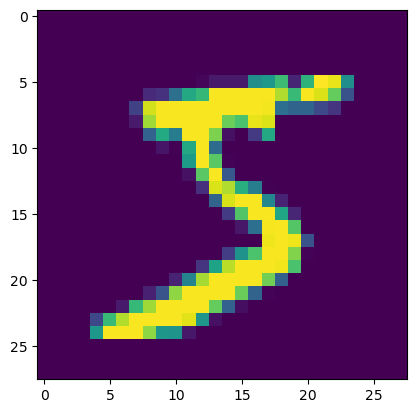

In [12]:
plt.imshow(train_images[0]) # This displays the first image of the train images in rgb

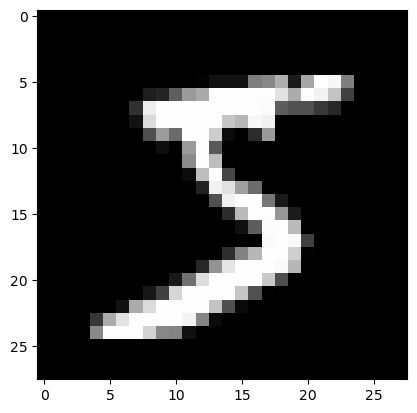

In [14]:
plt.imshow(train_images[0], cmap = 'gray')

In [16]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Since we are using neural networks, it is safer to use values between 0 and 1 rather than 0 to 255 (which is normalizing) to speed up the learning process and ensure faster convergence.
This would be done by simply dividing all values by 255.

In [18]:
img_train = train_images/255
img_test = test_images/255

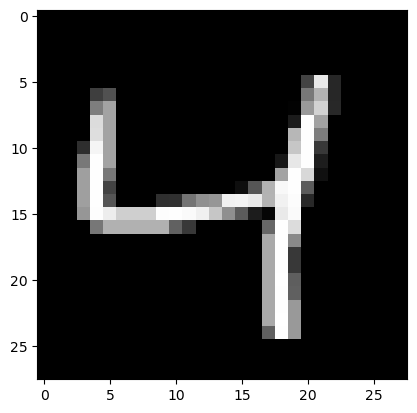

4

In [22]:
index = 2
plt.imshow(train_images[index], cmap = 'gray')
plt.show()
train_labels[index]

We now see that the image label corresponds with the value in the image.
Feel free to change the index values to confirm this

In [30]:
lbl_train = to_categorical(train_labels, 10)
lbl_test = to_categorical(test_labels, 10)

In [34]:
# Flatten the images to save memory space
num_samples_train, img_rows, img_cols = img_train.shape
img_train = img_train.reshape(num_samples_train, img_rows * img_cols)

In [36]:
model = Sequential([
    Input(shape=(img_rows * img_cols, )),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax') # The output layer with 10 neurons
])

In [38]:
model.compile(optimizer = 'adamW',
             loss = 'categorical_crossentropy')

In [40]:
model.fit(img_train, lbl_train, epochs =8, batch_size = 32)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4400
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1207
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0805
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0580
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0442
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0340
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0266
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0197


In [42]:
num_samples_test, _, _ = img_test.shape
img_test = img_test.reshape(num_samples_test, img_rows * img_cols)

In [44]:
y_true = lbl_test  # The true labels of the test set

# Use the model to predict on X_test
y_pred = model.predict(img_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [46]:

# Convert one-hot encoded labels to class labels
y_true = np.argmax(lbl_test, axis=1)  # Assuming lbl_test is one-hot encoded

# Convert the predicted probabilities to class labels
y_pred = np.argmax(model.predict(img_test), axis=1)  # Get predicted class labels

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step


In [48]:
# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro' for multi-class
recall = recall_score(y_true, y_pred, average='macro')

# Convert to percentage
accuracy_percentage = accuracy * 100
precision_percentage = precision * 100
recall_percentage = recall * 100

# Print the results as percentages
print(f'Accuracy: {accuracy_percentage:.2f}%')
print(f'Precision: {precision_percentage:.2f}%')
print(f'Recall: {recall_percentage:.2f}%')

Accuracy: 97.56%
Precision: 97.57%
Recall: 97.54%


In [50]:
predictions = model.predict(img_test[:20,:])
predictions_idx = predictions.argmax(1)
print(predictions_idx)
print(test_labels[:20])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [56]:
import tensorflow as tf
tf.keras.models.save_model(model, 'my_model.keras')